In [52]:
import pandas as pd
import numpy as np
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
from prophet import Prophet
import datetime

In [75]:
spy_ohlc_df = yf.download('SPY', start=datetime.date.today() - datetime.timedelta(days=7), end=datetime.date.today(), interval='1m')
df1=spy_ohlc_df.reset_index()

[*********************100%***********************]  1 of 1 completed


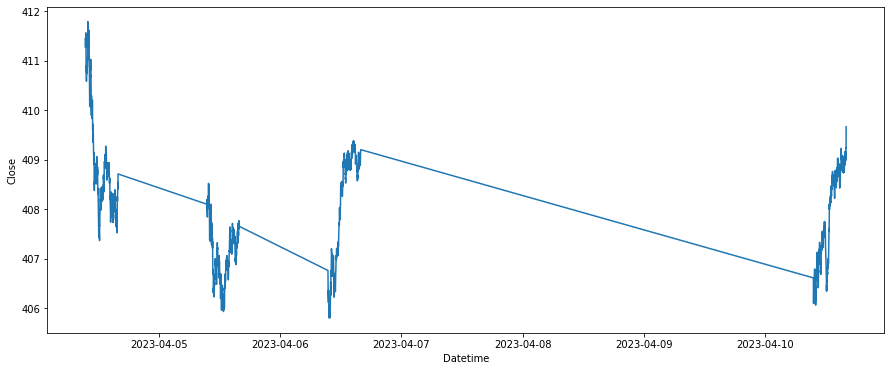

In [60]:
fig, ax = plt.subplots()
fig.set_size_inches(15,6)
sns.lineplot(x = 'Datetime', y = 'Close', data = df1)
plt.show()

16:11:26 - cmdstanpy - INFO - Chain [1] start processing
16:11:29 - cmdstanpy - INFO - Chain [1] done processing


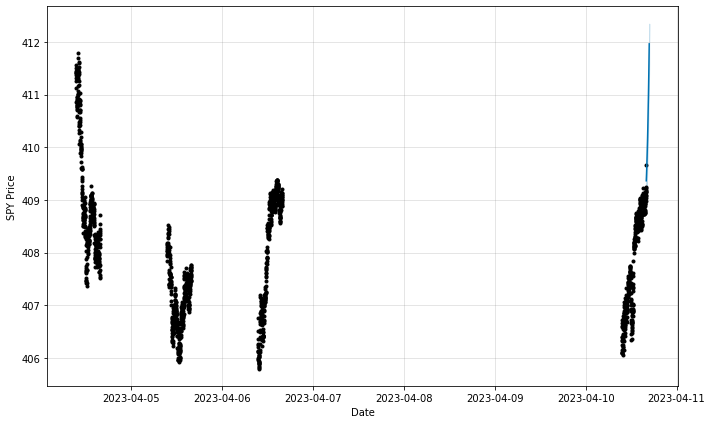

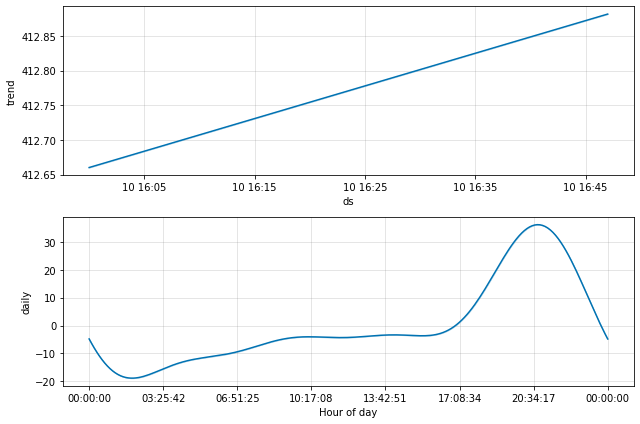

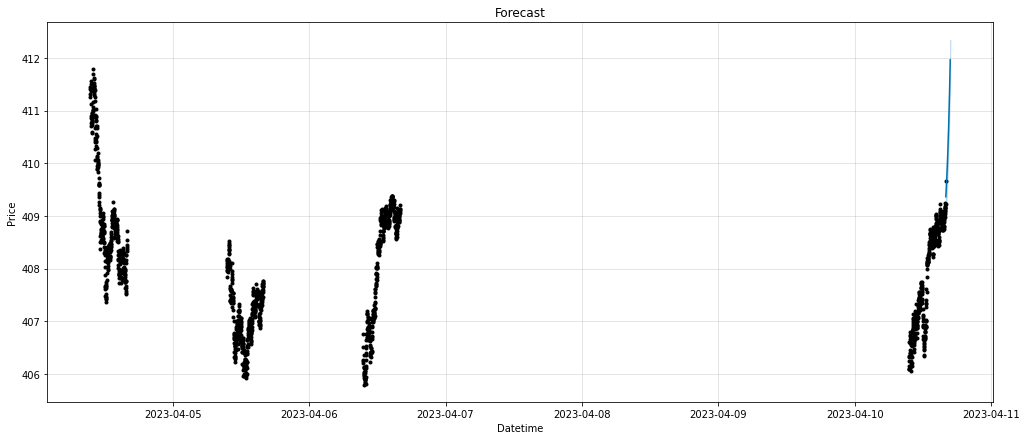

In [80]:
# Load SPY price data
spy_data = df1
spy_data = df1[['Datetime', 'Close']]
spy_data.columns = ['ds', 'y']

# Initialize Prophet model
model = Prophet()

# Fit the model on SPY data
model.fit(spy_data)

# Create future dates for forecasting
future_dates = model.make_future_dataframe(periods=48, freq='T', include_history=False)

# Make predictions for future dates
forecast = model.predict(future_dates)

# # Plot the forecasted data
model.plot(forecast, xlabel='Date', ylabel='SPY Price')

# # Plot the forecasted trend and seasonality components
model.plot_components(forecast)

In [68]:
spy_ohlc_df = yf.download('SPY', start=datetime.date.today() - datetime.timedelta(days=365), end=datetime.date.today())
df=spy_ohlc_df.reset_index()

[*********************100%***********************]  1 of 1 completed


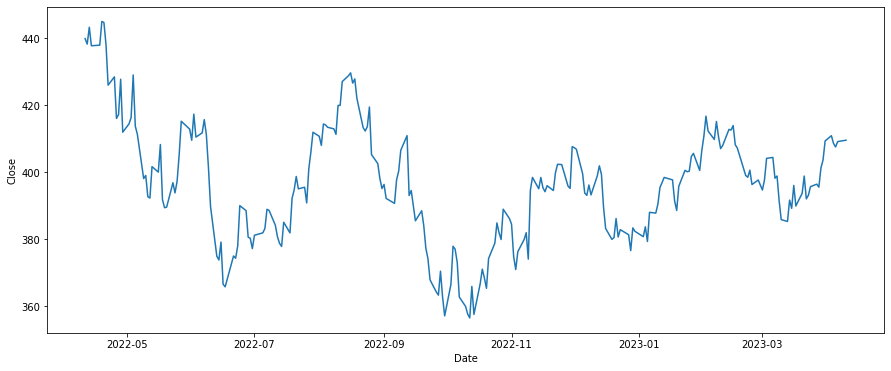

In [69]:
fig, ax = plt.subplots()
fig.set_size_inches(15,6)
sns.lineplot(x = 'Date', y = 'Close', data = df)
plt.show()

15:54:45 - cmdstanpy - INFO - Chain [1] start processing
15:54:45 - cmdstanpy - INFO - Chain [1] done processing


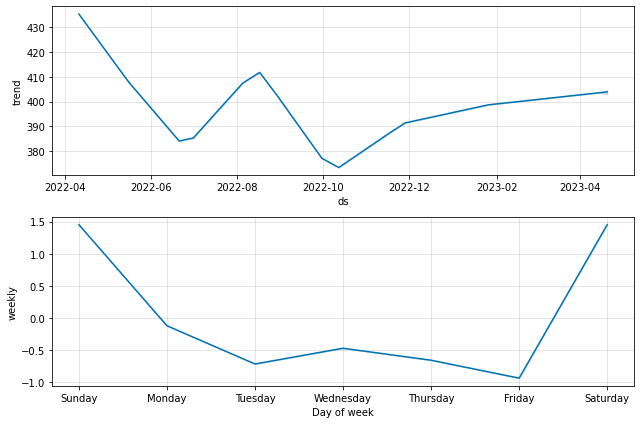

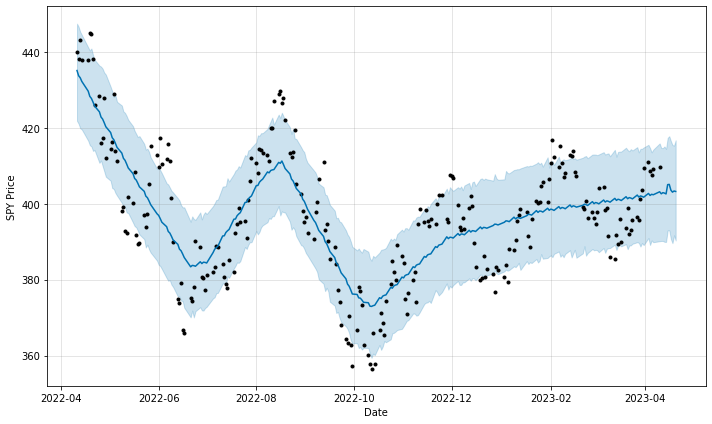

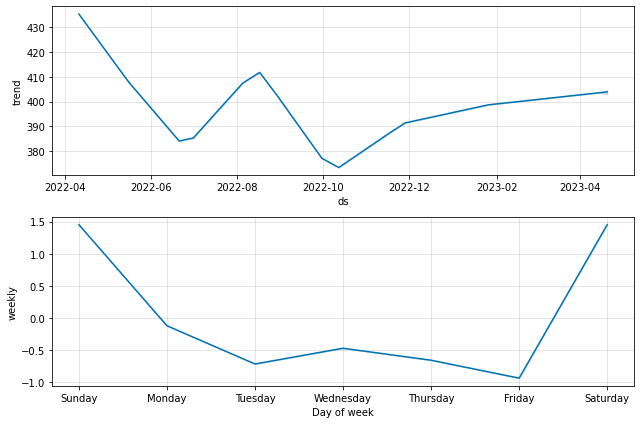

In [71]:
# Load SPY price data
spy_data = df
spy_data = df[['Date', 'Close']]
spy_data.columns = ['ds', 'y']

# Initialize Prophet model
model = Prophet()

# Fit the model on SPY data
model.fit(spy_data)

# Create future dates for forecasting
future_dates = model.make_future_dataframe(periods=10)

# Make predictions for future dates
forecast = model.predict(future_dates)

# Plot the forecasted data
model.plot(forecast, xlabel='Date', ylabel='SPY Price')

# Plot the forecasted trend and seasonality components
model.plot_components(forecast)
